In [2]:
# Part 1: Data Preprocessing and EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Star Type mapping:
# 0 = Red Dwarf, 1 = Brown Dwarf, 2 = White Dwarf,
# 3 = Main Sequence, 4 = Supergiant, 5 = Hypergiant

# Load dataset
df = pd.read_csv('train_test_dataset.csv')
validate_df = pd.read_csv('validate_dataset.csv')

In [3]:

df=df.drop(columns=['S.No.'])

Class distribution in Star_Type:
Star_Type
4    17.60
5    17.00
3    16.92
0    16.52
2    16.28
1    15.68
Name: proportion, dtype: float64


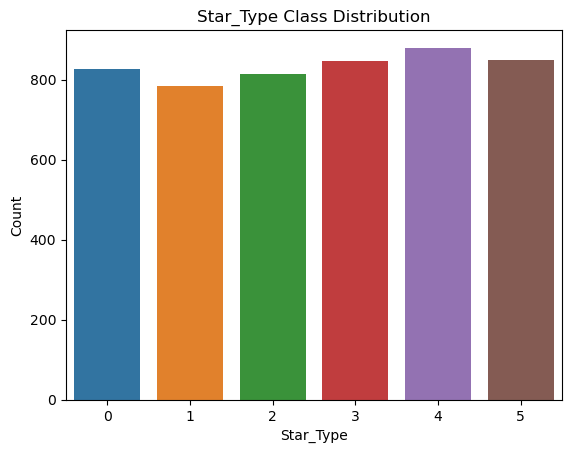

In [4]:
# Check for class imbalance in Star_Type
print("Class distribution in Star_Type:")
print(df['Star_Type'].value_counts(normalize=True) * 100)
sns.countplot(x='Star_Type', data=df)
plt.title('Star_Type Class Distribution')
plt.ylabel('Count')
plt.xlabel('Star_Type')
plt.show()

In [5]:

df.head(100)

,Temperature_K,Luminosity_Lo,Radius_Ro,Absolute_Magnitude,Star_Color,Spectral_Class,Star_Type
0,5132.872,1.159,1.084,6.011,Yellowish White,A,3
1,9295.788,0.013,0.009,14.534,White,D,2
2,5813.333,0.786,0.840,4.883,Blue White,G,3
3,5377.994,-0.070,0.811,5.598,White,F,3
4,5473.370,1.055,0.655,5.376,Yellowish White,G,3
...,...,...,...,...,...,...,...
95,5832.443,1.120,1.247,7.052,White,A,3
96,9595.890,0.014,0.015,15.074,White,D,2
97,5932.045,0.058,1.291,5.646,White,A,3
98,3495.585,0.048,0.672,10.335,Yellow,M,1


Number of unique Spectral_Class values in df: 8
Unique Spectral_Class values: ['A' 'D' 'G' 'F' 'K' 'M' 'O' 'B' nan]

Spectral_Class value counts (percentage):
Spectral_Class
M    22.865294
B    17.179539
D    16.588547
A    15.121255
O     8.742613
K     8.049725
G     5.746892
F     5.706134
Name: proportion, dtype: float64


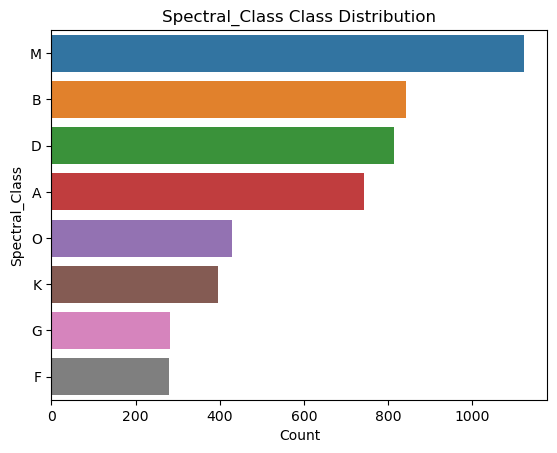

In [6]:
print("Number of unique Spectral_Class values in df:", df['Spectral_Class'].nunique())
print("Unique Spectral_Class values:", df['Spectral_Class'].unique())
print("\nSpectral_Class value counts (percentage):")
print(df['Spectral_Class'].value_counts(normalize=True) * 100)
sns.countplot(y='Spectral_Class', data=df, order=df['Spectral_Class'].value_counts().index)
plt.title('Spectral_Class Class Distribution')
plt.xlabel('Count')
plt.ylabel('Spectral_Class')
plt.show()

Correlation of Star_Type with other features:
Temperature_K         0.835004
Luminosity_Lo         0.697074
Radius_Ro             0.821730
Absolute_Magnitude   -0.956318
Name: Star_Type, dtype: float64


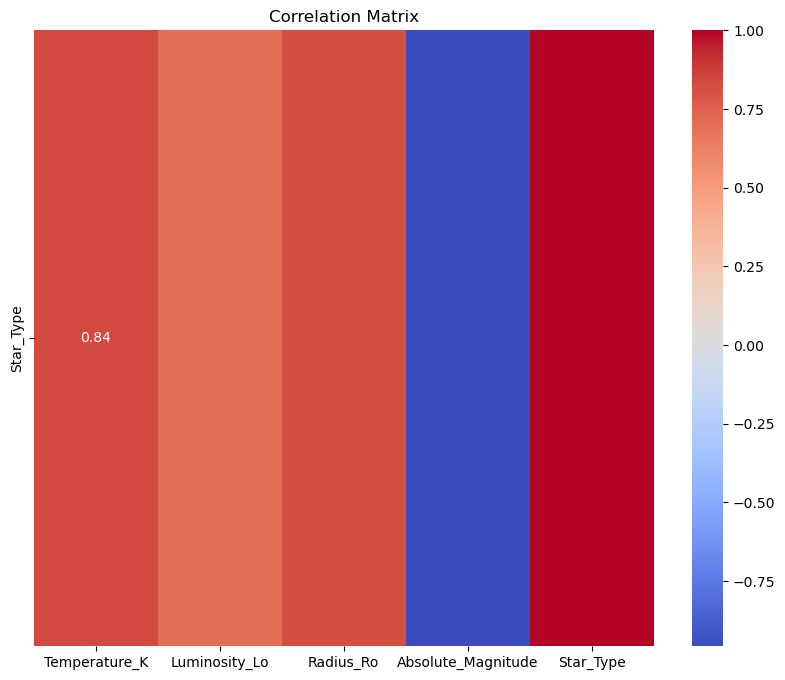

In [7]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
# Calculate correlation of Star_Type with all other numeric columns
star_type_corr = corr['Star_Type'].drop('Star_Type')
print("Correlation of Star_Type with other features:")
print(star_type_corr)

# Plot heatmap for Star_Type correlations with all features
sns.heatmap(corr[['Star_Type']].T, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Correlation between different variables**

<Axes: >

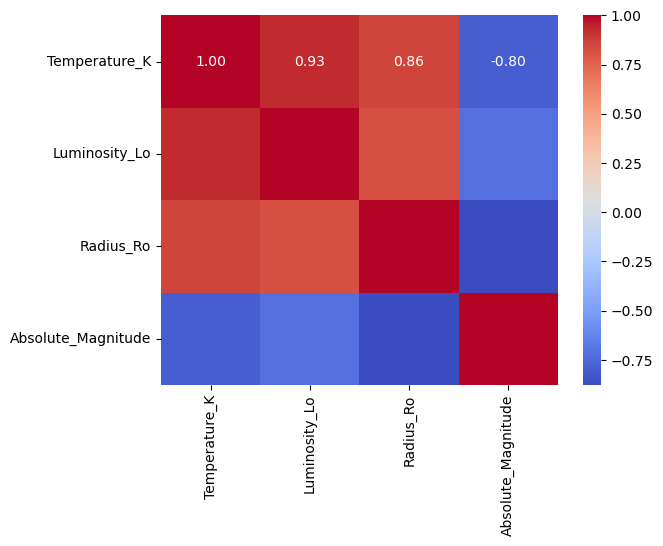

In [8]:
corr = df.iloc[:,0:4].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

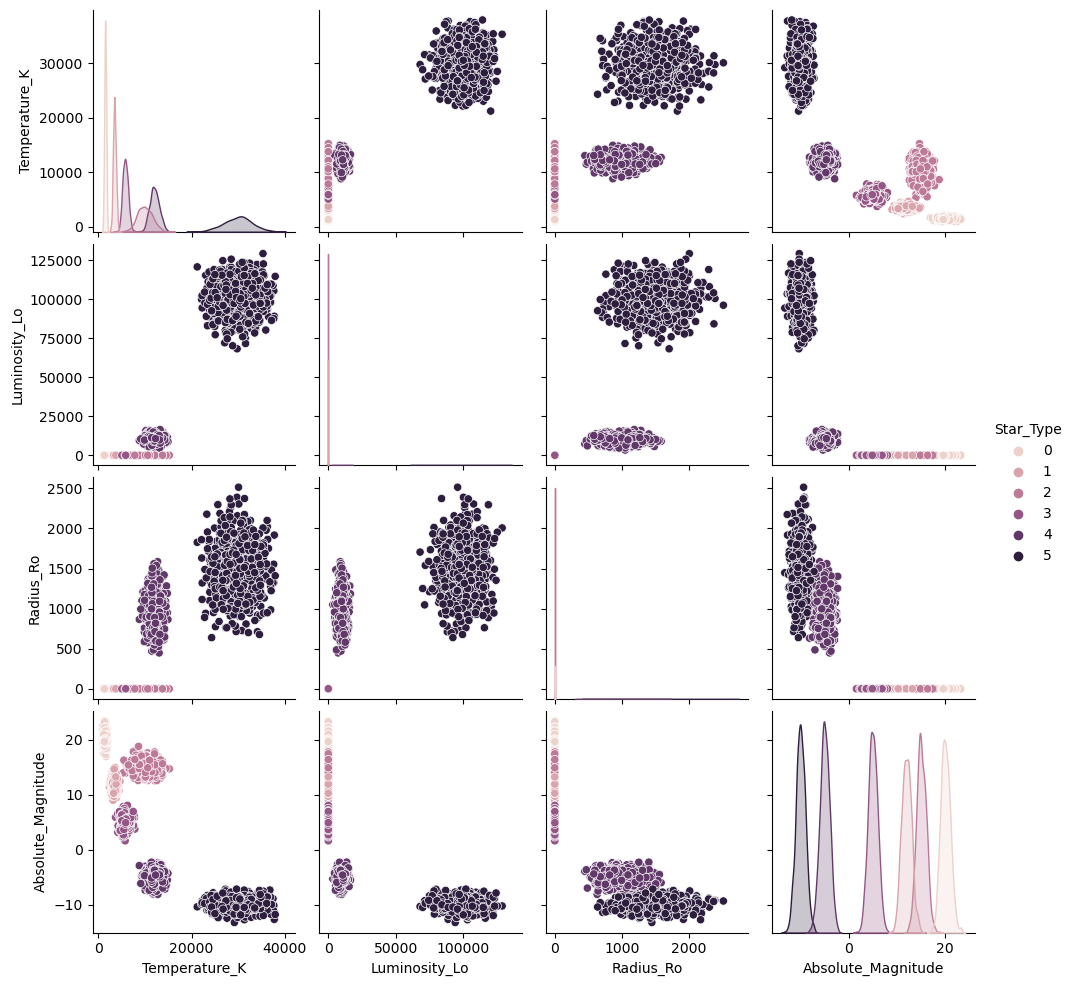

In [9]:
# Pairplot colored by Star Type
# checking for outliers
sns.pairplot(df, hue='Star_Type')
plt.show()

outliers in the above data is minimum, hence only scaling will do the job

**NUMERICAL FEATURES**

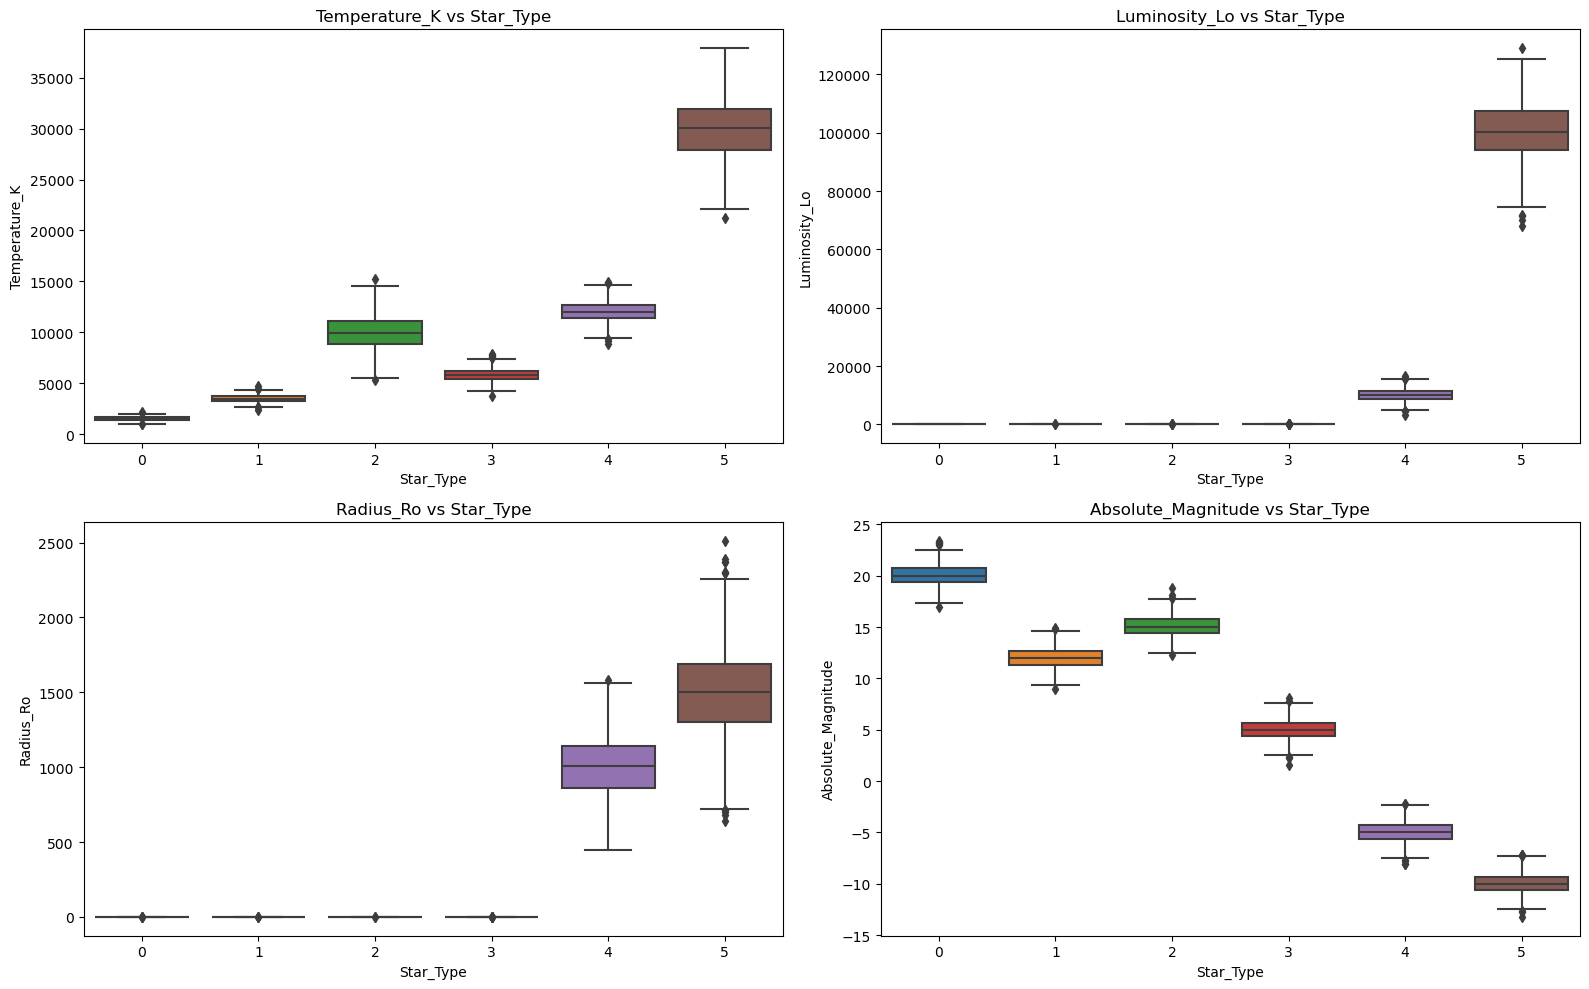


Value ranges for Temperature_K by Star_Type:
  Star_Type 0: min=945.43, Q1=1378.82, median=1508.67, Q3=1654.49, max=2117.46
  Star_Type 1: min=2391.01, Q1=3270.78, median=3483.13, Q3=3704.44, max=4670.84
  Star_Type 2: min=5325.02, Q1=8833.92, median=9915.24, Q3=11113.55, max=15243.82
  Star_Type 3: min=3713.10, Q1=5382.32, median=5784.50, Q3=6200.75, max=7851.17
  Star_Type 4: min=8804.38, Q1=11398.26, median=12016.64, Q3=12721.79, max=14938.19
  Star_Type 5: min=21211.65, Q1=27896.67, median=30111.47, Q3=31946.15, max=37911.34

Value ranges for Luminosity_Lo by Star_Type:
  Star_Type 0: min=0.00, Q1=0.00, median=0.00, Q3=0.00, max=0.00
  Star_Type 1: min=0.01, Q1=0.03, median=0.04, Q3=0.05, max=0.07
  Star_Type 2: min=-0.01, Q1=0.01, median=0.01, Q3=0.01, max=0.03
  Star_Type 3: min=-0.78, Q1=0.70, median=0.98, Q3=1.35, max=2.93
  Star_Type 4: min=3340.99, Q1=8742.54, median=10129.07, Q3=11443.07, max=16459.66
  Star_Type 5: min=68121.88, Q1=94106.16, median=100295.94, Q3=107460.09,

In [10]:
# Generate boxplots for each numerical variable vs Star_Type
num_cols = ['Temperature_K', 'Luminosity_Lo', 'Radius_Ro', 'Absolute_Magnitude']
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Star_Type', y=col, data=df)
    plt.title(f'{col} vs Star_Type')
plt.tight_layout()
plt.show()

# Print value ranges (min, Q1, median, Q3, max) for each Star_Type and variable
for col in num_cols:
    print(f"\nValue ranges for {col} by Star_Type:")
    summary = df.groupby('Star_Type')[col].describe(percentiles=[0.25, 0.5, 0.75])
    for star_type, stats in summary.iterrows():
        print(f"  Star_Type {star_type}: min={stats['min']:.2f}, Q1={stats['25%']:.2f}, median={stats['50%']:.2f}, Q3={stats['75%']:.2f}, max={stats['max']:.2f}")


# Star Type mapping:
# 0 = Red Dwarf, 1 = Brown Dwarf, 2 = White Dwarf,
# 3 = Main Sequence, 4 = Supergiant, 5 = Hypergiant

In [11]:
# Create a summary table of value ranges for each numerical variable by Star_Type

import pandas as pd

num_cols = ['Temperature_K', 'Luminosity_Lo', 'Radius_Ro', 'Absolute_Magnitude']
summary_tables = []

for col in num_cols:
    summary = df.groupby('Star_Type')[col].describe(percentiles=[0.25, 0.5, 0.75])
    summary = summary[['min','max']]
    summary.columns = pd.MultiIndex.from_product([[col], summary.columns])
    summary_tables.append(summary)

# Concatenate all summaries into a single table
summary_table = pd.concat(summary_tables, axis=1)
display(summary_table)

# Optionally, print as markdown for easy copy-paste
print(summary_table.to_markdown())

Temperature_K            Luminosity_Lo             Radius_Ro  \
                    min        max           min         max       min   
Star_Type                                                                
0               945.432   2117.463         0.000       0.000     0.037   
1              2391.013   4670.840         0.010       0.071     0.351   
2              5325.021  15243.817        -0.005       0.026    -0.002   
3              3713.098   7851.167        -0.784       2.926    -0.157   
4              8804.376  14938.188      3340.992   16459.658   448.081   
5             21211.654  37911.340     68121.885  129029.416   638.560   

                    Absolute_Magnitude          
                max                min     max  
Star_Type                                       
0             0.158             16.948  23.414  
1             1.024              8.990  14.935  
2             0.018             12.324  18.777  
3             2.012              1.613   8.060  
4          1585.454             -8.121  -2.255  
5          2513.215            -13.227  -7.158

|   Star_Type |   ('Temperature_K', 'min') |   ('Temperature_K', 'max') |   ('Luminosity_Lo', 'min') |   ('Luminosity_Lo', 'max') |   ('Radius_Ro', 'min') |   ('Radius_Ro', 'max') |   ('Absolute_Magnitude', 'min') |   ('Absolute_Magnitude', 'max') |
|------------:|---------------------------:|---------------------------:|---------------------------:|---------------------------:|-----------------------:|-----------------------:|--------------------------------:|--------------------------------:|
|           0 |                    945.432 |                    2117.46 |                      0     |                      0     |                  0.037 |                  0.158 |                          16.948 |                          23.414 |
|           1 |                   2391.01  |                    4670.84 |                      0.01  |                      0.071 |                  0.351 |                  1.024 |                           8.99  |                          14.935 |


|   Star_Type |   ('Temperature_K', 'min') |   ('Temperature_K', 'max') |   ('Luminosity_Lo', 'min') |   ('Luminosity_Lo', 'max') |   ('Radius_Ro', 'min') |   ('Radius_Ro', 'max') |   ('Absolute_Magnitude', 'min') |   ('Absolute_Magnitude', 'max') |
|------------:|---------------------------:|---------------------------:|---------------------------:|---------------------------:|-----------------------:|-----------------------:|--------------------------------:|--------------------------------:|
|           0 |                    945.432 |                    2117.46 |                      0     |                      0     |                  0.037 |                  0.158 |                          16.948 |                          23.414 |
|           1 |                   2391.01  |                    4670.84 |                      0.01  |                      0.071 |                  0.351 |                  1.024 |                           8.99  |                          14.935 |
|           2 |                   5325.02  |                   15243.8  |                     -0.005 |                      0.026 |                 -0.002 |                  0.018 |                          12.324 |                          18.777 |
|           3 |                   3713.1   |                    7851.17 |                     -0.784 |                      2.926 |                 -0.157 |                  2.012 |                           1.613 |                           8.06  |
|           4 |                   8804.38  |                   14938.2  |                   3340.99  |                  16459.7   |                448.081 |               1585.45  |                          -8.121 |                          -2.255 |
|           5 |                  21211.7   |                   37911.3  |                  68121.9   |                 129029     |                638.56  |               2513.22  |                         -13.227 |                          -7.158 |

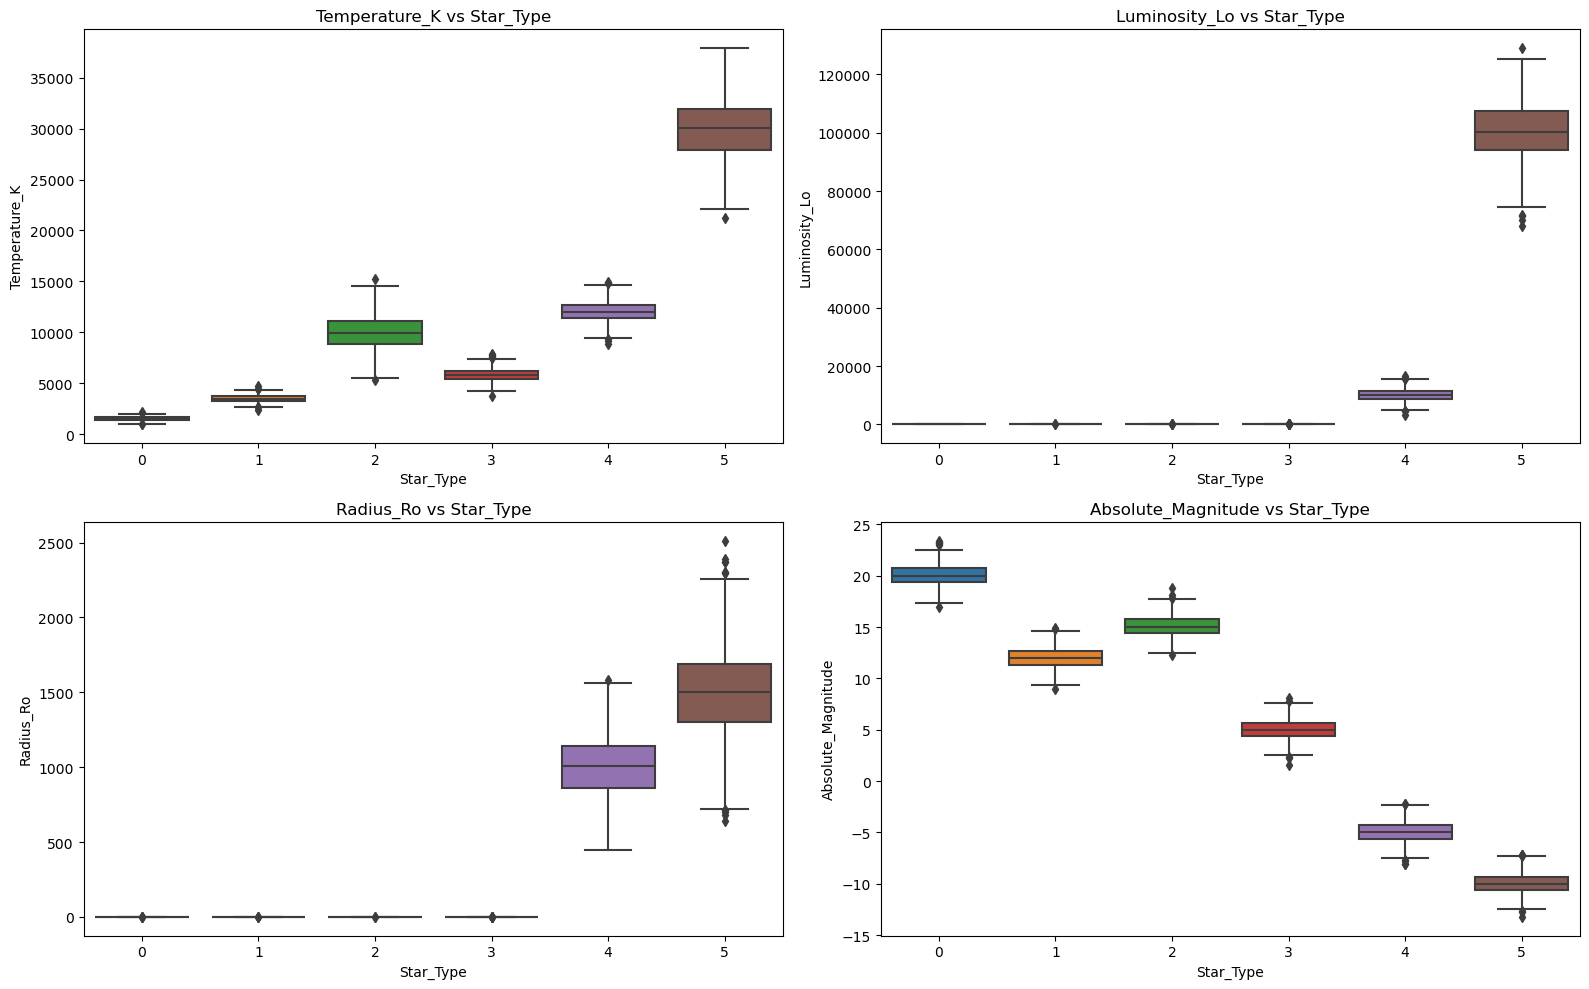

In [12]:
# Generate boxplots for each numerical variable vs Star_Type
num_cols = ['Temperature_K', 'Luminosity_Lo', 'Radius_Ro', 'Absolute_Magnitude']
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Star_Type', y=col, data=df)
    plt.title(f'{col} vs Star_Type')
plt.tight_layout()
plt.show()


# Star Type mapping:
# 0 = Red Dwarf, 1 = Brown Dwarf, 2 = White Dwarf,
# 3 = Main Sequence, 4 = Supergiant, 5 = Hypergiant

In [13]:
print(df['Star_Color'].value_counts())

Star_Color
Blue White         1081
White               967
Red                 639
Blue                591
Brown               436
Yellowish           287
Yellowish White     272
Yellow              271
Orange              264
Name: count, dtype: int64


c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


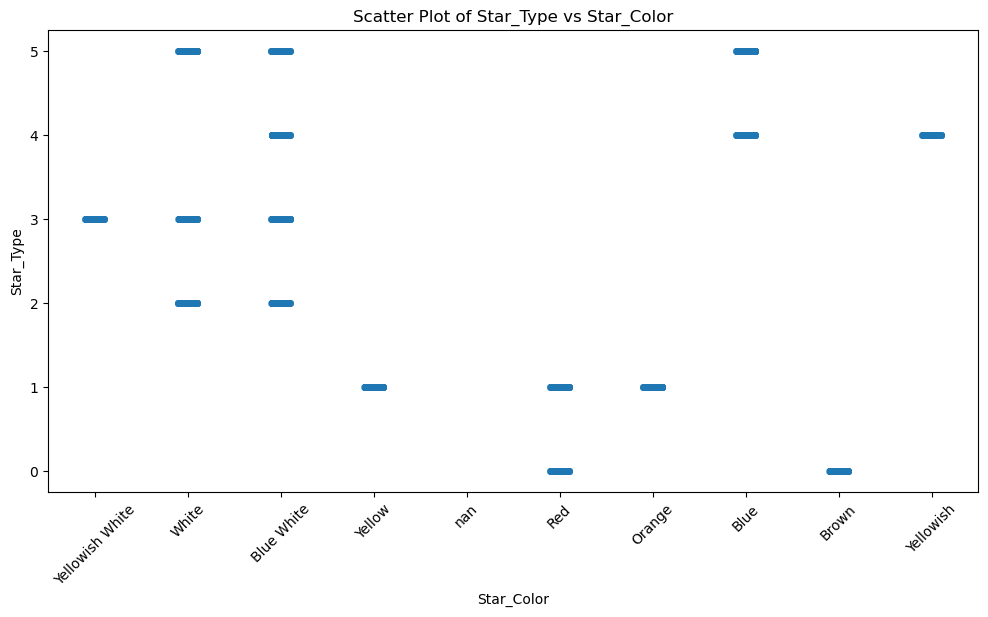

In [14]:
# Scatter plot of Star_Type vs Star_Color
plt.figure(figsize=(12, 6))
sns.stripplot(x='Star_Color', y='Star_Type', data=df, jitter=True, alpha=0.7)
plt.title('Scatter Plot of Star_Type vs Star_Color')
plt.xlabel('Star_Color')
plt.ylabel('Star_Type')
plt.xticks(rotation=45)
plt.show()

c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aryn3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


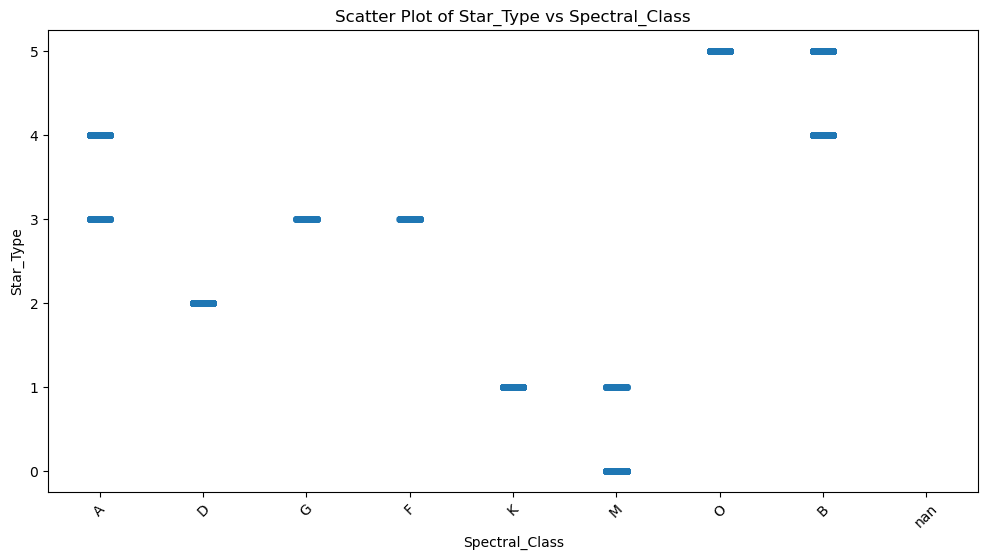

In [15]:
# Scatter plot of Star_Type vs Spectral_Class
plt.figure(figsize=(12, 6))
sns.stripplot(x='Spectral_Class', y='Star_Type', data=df, jitter=True, alpha=0.7)
plt.title('Scatter Plot of Star_Type vs Spectral_Class')
plt.xlabel('Spectral_Class')
plt.ylabel('Star_Type')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Normalising all the color values
# this is also done before encoding in the pipeline

df['Star_Color'] = df['Star_Color'].str.lower().str.replace('-', ' ').str.strip()
print(df['Star_Color'].value_counts())

Star_Color
blue white         1081
white               967
red                 639
blue                591
brown               436
yellowish           287
yellowish white     272
yellow              271
orange              264
Name: count, dtype: int64


Handeling missing data

In [17]:
# %of missing data category wise
print(df.isnull().mean()*100)
df.shape

Temperature_K         0.14
Luminosity_Lo         0.00
Radius_Ro             0.00
Absolute_Magnitude    0.00
Star_Color            3.84
Spectral_Class        1.86
Star_Type             0.00
dtype: float64


(5000, 7)

In [18]:
cols=df.columns
len(df[cols].dropna())/len(df)

0.9418

if we drop the columns with missing data 94.18% of the data will be preserved


next step will be to drop the rows with missing data as all the missing data is under 5% of tolerance limit

note that we could have used simple imputer to fill in the missing data, but scope of this project solely relies on accuracy hence no data filling is done.

In [19]:
new_df=df[cols].dropna()
print(df.shape)
print(new_df.shape)
print(new_df.isnull().mean()*100)
print(new_df.head())

(5000, 7)
(4709, 7)
Temperature_K         0.0
Luminosity_Lo         0.0
Radius_Ro             0.0
Absolute_Magnitude    0.0
Star_Color            0.0
Spectral_Class        0.0
Star_Type             0.0
dtype: float64
   Temperature_K  Luminosity_Lo  Radius_Ro  Absolute_Magnitude  \
0       5132.872          1.159      1.084               6.011   
1       9295.788          0.013      0.009              14.534   
2       5813.333          0.786      0.840               4.883   
3       5377.994         -0.070      0.811               5.598   
4       5473.370          1.055      0.655               5.376   

        Star_Color Spectral_Class  Star_Type  
0  yellowish white              A          3  
1            white              D          2  
2       blue white              G          3  
3            white              F          3  
4  yellowish white              G          3  


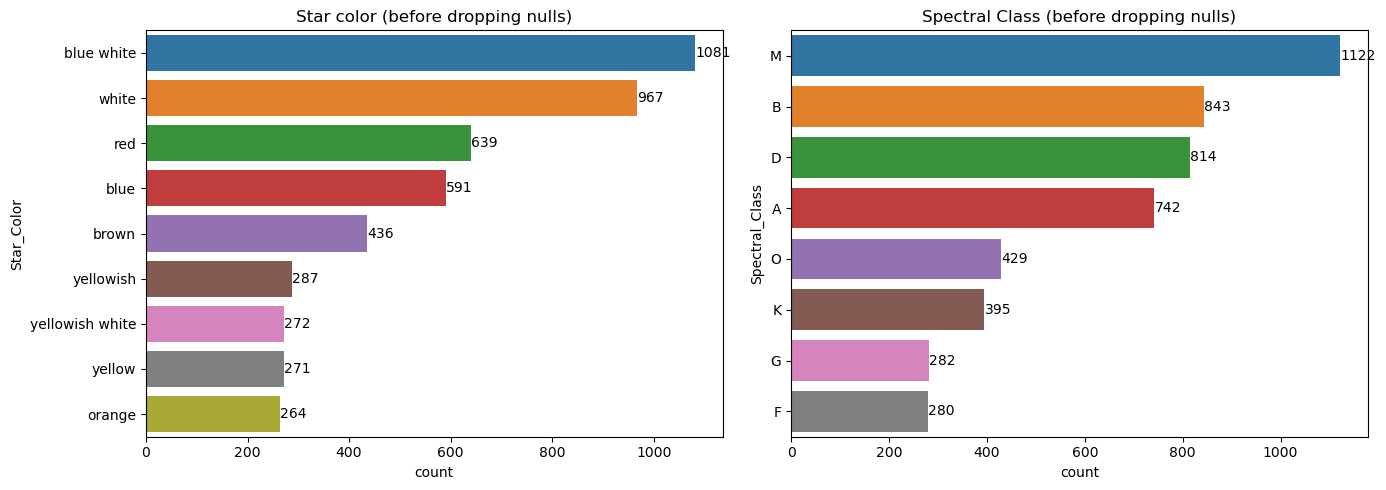

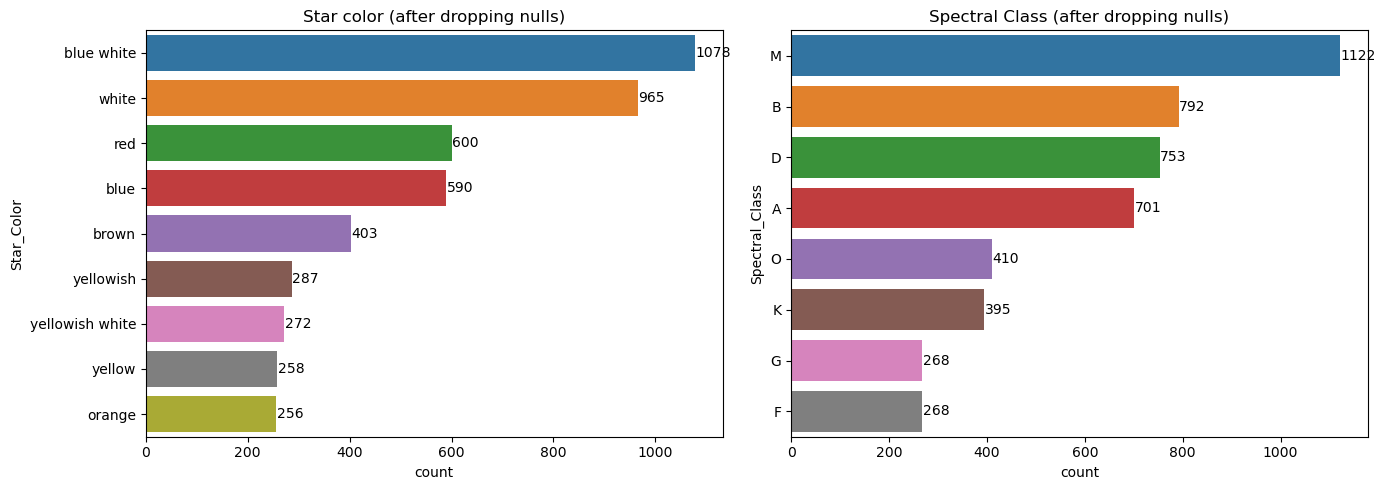

In [20]:
# confirming that the missing values were random

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# Star color plot with count labels
sns.countplot(y=df['Star_Color'], order=df['Star_Color'].value_counts().index, ax=axs[0])
axs[0].set_title('Star color (before dropping nulls)')
for p in axs[0].patches:
    width = p.get_width()
    axs[0].text(width + 0.5, p.get_y() + p.get_height() / 2, int(width), va='center')

# Spectral class plot with count labels
sns.countplot(y=df['Spectral_Class'], order=df['Spectral_Class'].value_counts().index, ax=axs[1])
axs[1].set_title('Spectral Class (before dropping nulls)')
for p in axs[1].patches:
    width = p.get_width()
    axs[1].text(width + 0.5, p.get_y() + p.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()
# print(df['Star_Color'].value_counts())
# print(df['Spectral_Class'].value_counts())
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Star color plot with count labels
sns.countplot(y=new_df['Star_Color'], order=new_df['Star_Color'].value_counts().index, ax=axs[0])
axs[0].set_title('Star color (after dropping nulls)')
for p in axs[0].patches:
    width = p.get_width()
    axs[0].text(width + 0.5, p.get_y() + p.get_height() / 2, int(width), va='center')

# Spectral class plot with count labels
sns.countplot(y=new_df['Spectral_Class'], order=new_df['Spectral_Class'].value_counts().index, ax=axs[1])
axs[1].set_title('Spectral Class (after dropping nulls)')
for p in axs[1].patches:
    width = p.get_width()
    axs[1].text(width + 0.5, p.get_y() + p.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()
# print(new_df['Star_Color'].value_counts())
# print(new_df['Spectral_Class'].value_counts())



Train Test SPLIT

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
new_df

,Temperature_K,Luminosity_Lo,Radius_Ro,Absolute_Magnitude,Star_Color,Spectral_Class,Star_Type
0,5132.872,1.159,1.084,6.011,yellowish white,A,3
1,9295.788,0.013,0.009,14.534,white,D,2
2,5813.333,0.786,0.840,4.883,blue white,G,3
3,5377.994,-0.070,0.811,5.598,white,F,3
4,5473.370,1.055,0.655,5.376,yellowish white,G,3
...,...,...,...,...,...,...,...
4995,5780.565,0.988,0.728,4.631,white,F,3
4996,31268.803,115006.154,1513.587,-10.494,blue white,B,5
4997,7848.735,0.017,0.008,16.385,white,D,2
4998,5890.130,1.714,1.417,4.912,blue white,A,3


In [23]:
X_train,X_test,y_train,y_test = train_test_split(new_df.drop(columns=['Star_Type']),new_df['Star_Type'],test_size=0.1)

In [24]:
y_test

2897    3
2716    4
1253    3
3957    5
1782    0
       ..
1041    2
145     0
1202    2
1078    2
4152    1
Name: Star_Type, Length: 471, dtype: int64

In [25]:
print('X_train counts:\n',X_train.count(),X_train.shape,'\n')
print('X_test counts:\n',X_test.count(),X_test.shape)

X_train counts:
 Temperature_K         4238
Luminosity_Lo         4238
Radius_Ro             4238
Absolute_Magnitude    4238
Star_Color            4238
Spectral_Class        4238
dtype: int64 (4238, 6) 

X_test counts:
 Temperature_K         471
Luminosity_Lo         471
Radius_Ro             471
Absolute_Magnitude    471
Star_Color            471
Spectral_Class        471
dtype: int64 (471, 6)


In [26]:
# Check for duplicate rows between X_train and X_test
overlap = pd.merge(X_train, X_test, how='inner')
print(f"Number of overlapping rows between X_train and X_test: {len(overlap)}")

# Check for columns with constant values in both sets
constant_cols = [col for col in X_train.columns if (X_train[col].nunique() == 1 and X_test[col].nunique() == 1 and X_train[col].iloc[0] == X_test[col].iloc[0])]
print(f"Columns with constant values in both X_train and X_test: {constant_cols}")

# Check for columns with identical distributions (optional deeper check)
for col in X_train.columns:
    if X_train[col].equals(X_test[col]):
        print(f"Column '{col}' is identical in X_train and X_test.")

Number of overlapping rows between X_train and X_test: 0
Columns with constant values in both X_train and X_test: []


In [27]:
cat_cols = ['Star_Color', 'Spectral_Class']
trf2= ColumnTransformer(transformers=[
    ('scale', StandardScaler(),[col for col in X_train.columns if col not in cat_cols]),
    ('encode',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),cat_cols),
],remainder='passthrough')

In [28]:
X_train_new=trf2.fit_transform(X_train)

c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
X_test_new=trf2.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt= DecisionTreeClassifier()

In [32]:
dt.fit(X_train_new,y_train)

DecisionTreeClassifier()

In [33]:
X_test_new=trf2.fit_transform(X_test)
print(pd.DataFrame(X_test_new))

           0         1         2         3    4    5    6    7    8    9   \
0   -0.515659 -0.534851 -0.722425  0.032691  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.113708 -0.216785  0.917648 -0.957837  0.0  0.0  0.0  0.0  0.0  0.0   
2   -0.592561 -0.534863 -0.723157 -0.067290  0.0  0.0  0.0  0.0  0.0  0.0   
3    2.445807  2.432968  1.994587 -1.155979  1.0  0.0  0.0  0.0  0.0  0.0   
4   -0.986903 -0.534898 -0.725040  1.336533  0.0  0.0  0.0  1.0  0.0  0.0   
..        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
466  0.044305 -0.534898 -0.725083  0.876113  1.0  0.0  0.0  0.0  0.0  0.0   
467 -0.955972 -0.534898 -0.724863  1.354364  0.0  1.0  0.0  0.0  0.0  0.0   
468  0.065471 -0.534898 -0.725080  0.871291  0.0  0.0  0.0  0.0  1.0  0.0   
469  0.032194 -0.534898 -0.725082  0.881207  0.0  0.0  0.0  0.0  1.0  0.0   
470 -0.783313 -0.534897 -0.724171  0.556884  0.0  0.0  0.0  1.0  0.0  0.0   

      10   11   12   13   14   15   16   17   18  
0    0.0  1.0  0.0  0.0 

c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


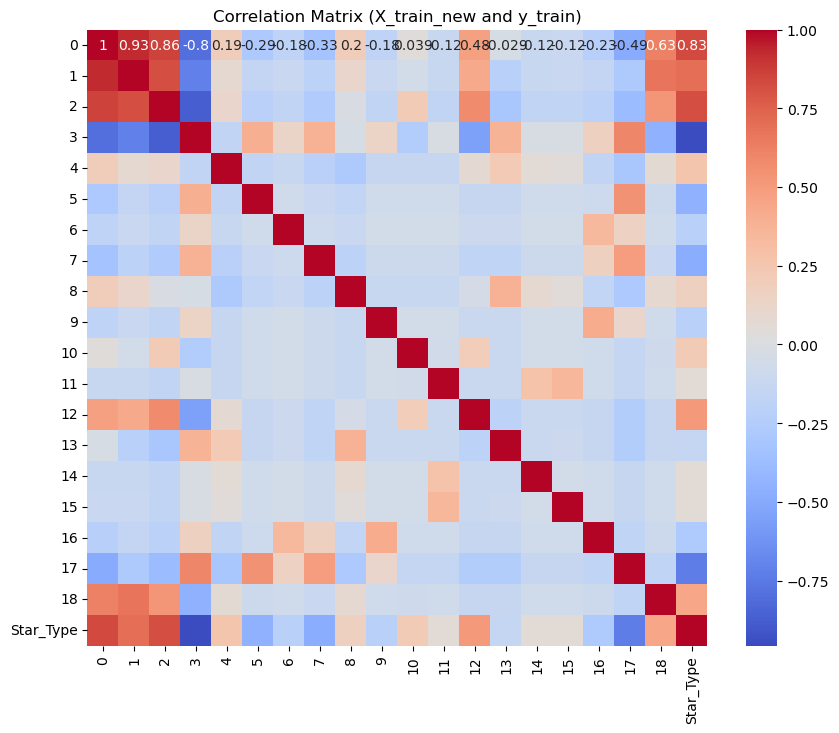

In [34]:
# Create a DataFrame from X_train_new
X_train_new_df = pd.DataFrame(X_train_new)

# Concatenate y_train for correlation
corr_df = pd.concat([X_train_new_df, y_train.reset_index(drop=True)], axis=1)

# Compute correlation matrix
corr_matrix = corr_df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (X_train_new and y_train)')
plt.show()

In [35]:
y_pr=dt.predict(X_test_new)
y_pr

array([3, 4, 3, 5, 0, 0, 4, 0, 4, 5, 4, 3, 5, 0, 5, 3, 3, 5, 0, 5, 5, 3,
       0, 3, 4, 2, 3, 0, 0, 0, 5, 2, 0, 0, 2, 0, 4, 3, 5, 5, 0, 4, 5, 0,
       4, 0, 0, 5, 0, 2, 2, 5, 4, 3, 0, 2, 5, 5, 4, 0, 5, 0, 0, 0, 5, 4,
       3, 5, 2, 2, 2, 5, 3, 3, 5, 0, 0, 3, 3, 2, 4, 4, 4, 2, 0, 4, 4, 3,
       2, 5, 5, 0, 5, 3, 5, 2, 0, 3, 2, 0, 0, 0, 3, 3, 4, 0, 0, 0, 2, 3,
       0, 5, 3, 2, 0, 0, 3, 0, 3, 0, 5, 2, 0, 4, 0, 5, 0, 3, 0, 5, 4, 0,
       0, 3, 4, 2, 0, 5, 0, 0, 3, 2, 0, 4, 4, 2, 0, 2, 0, 0, 5, 3, 4, 0,
       0, 5, 5, 4, 0, 2, 4, 0, 5, 4, 5, 3, 5, 3, 0, 5, 4, 3, 0, 0, 5, 2,
       2, 0, 2, 2, 4, 3, 5, 0, 3, 4, 4, 0, 0, 0, 2, 5, 5, 0, 3, 5, 5, 5,
       4, 5, 3, 5, 0, 3, 0, 2, 3, 3, 3, 4, 4, 0, 0, 2, 3, 0, 3, 2, 0, 5,
       5, 4, 3, 3, 0, 4, 0, 5, 0, 3, 2, 5, 5, 3, 0, 4, 3, 4, 5, 3, 0, 5,
       0, 4, 4, 5, 5, 5, 3, 4, 0, 0, 0, 2, 0, 5, 0, 4, 3, 4, 4, 2, 4, 0,
       0, 2, 0, 3, 4, 4, 3, 5, 0, 0, 0, 5, 5, 2, 0, 5, 4, 5, 3, 5, 5, 2,
       5, 0, 4, 0, 0, 4, 4, 0, 5, 3, 5, 4, 0, 4, 0,

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pr)

0.8577494692144374

In [37]:
import numpy as np
import pandas as pd


print(pd.DataFrame(X_train_new).head())

         0         1         2         3    4    5    6    7    8    9    10  \
0 -0.914021 -0.502706 -0.684491  1.220014  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1 -0.769943 -0.502705 -0.683449  0.436037  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2 -0.439352 -0.502676 -0.683775 -0.142767  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  2.129535  2.166706  2.008356 -1.497667  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096797 -0.502706 -0.684604  0.766650  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    11   12   13   14   15   16   17   18  
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to drop rows with missing values
class DropMissingRows(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.dropna()

# Build the pipeline: drop missing rows, then encode/scale
preprocessing_pipeline = Pipeline([
    ('remove_missing', DropMissingRows()),
    ('column_transform', trf2)
])

# Example usage:
# X_train_processed = preprocessing_pipeline.fit_transform(X_train)
# X_test_processed = preprocessing_pipeline.transform(X_test)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define the three models
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

# Fit each model on the transformed training data
rf.fit(X_train_new, y_train)
svc.fit(X_train_new, y_train)
knn.fit(X_train_new, y_train)

# Add them to pipelines (using the same preprocessing pipeline)
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

svc_pipeline = Pipeline([

    ('preprocessing', preprocessing_pipeline),
    ('classifier', SVC(probability=True, random_state=42))
])

knn_pipeline = Pipeline([

    ('preprocessing', preprocessing_pipeline),
    ('classifier', KNeighborsClassifier())
])

# Example: fit pipelines on X_train and y_train
rf_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('remove_missing', DropMissingRows()),
                                 ('column_transform',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   ['Temperature_K',
                                                                    'Luminosity_Lo',
                                                                    'Radius_Ro',
                                                                    'Absolute_Magnitude']),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   ['Star_Color',
                                                                    'Spectral_Class'])]))])),
                ('classifier', KNeighborsClassifier())])

Random Forest Pipeline Metrics:
Precision (macro): 1.0
Accuracy: 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
F2 Score (macro): 1.0
Confusion Matrix:
 [[81  0  0  0  0  0]
 [ 0 67  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 88  0  0]
 [ 0  0  0  0 87  0]
 [ 0  0  0  0  0 88]]
AUC-ROC (macro, OVR): 1.0


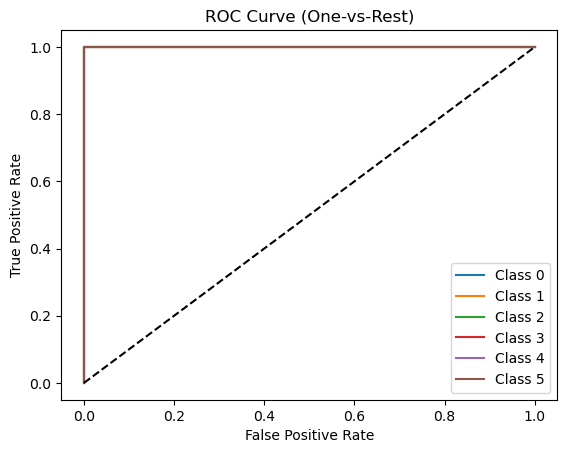

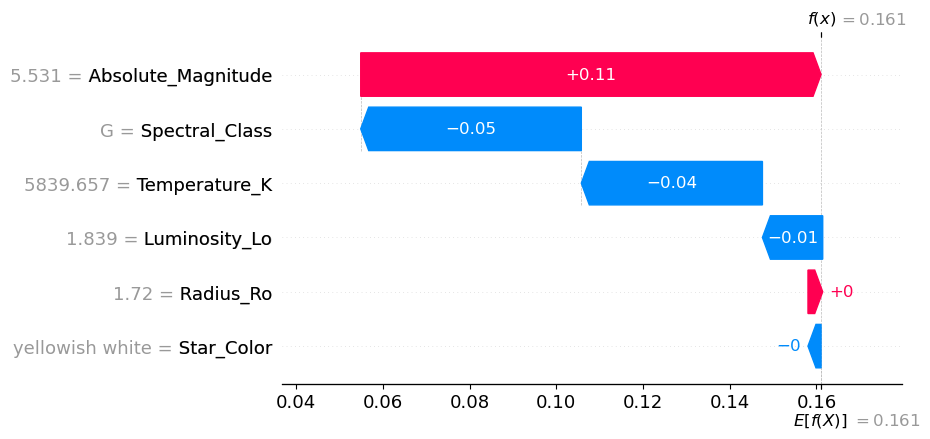

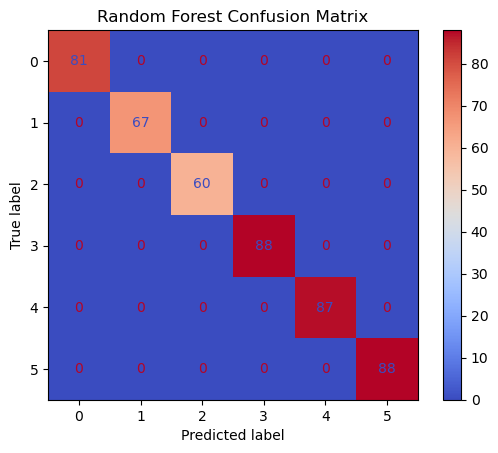

In [48]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, fbeta_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, roc_auc_score, roc_curve
import shap
# Predict using the Random Forest pipeline
rf_pred = rf_pipeline.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred, average='macro')
f1 = f1_score(y_test, rf_pred, average='macro')
f2 = fbeta_score(y_test, rf_pred, beta=2, average='macro')
cm = confusion_matrix(y_test, rf_pred)
# Precision (macro)
precision = precision_score(y_test, rf_pred, average='macro')
print("Random Forest Pipeline Metrics:")
print("Precision (macro):", precision)
print("Accuracy:", acc)
print("Recall (macro):", recall)
print("F1 Score (macro):", f1)
print("F2 Score (macro):", f2)
print("Confusion Matrix:\n", cm)

# AUC-ROC (One-vs-Rest, macro)
# For multiclass, need probability estimates
if hasattr(rf_pipeline.named_steps['classifier'], "predict_proba"):
    y_proba = rf_pipeline.predict_proba(X_test)
    auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    print("AUC-ROC (macro, OVR):", auc_roc)
    # Plot ROC curve for each class
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import label_binarize
    n_classes = y_proba.shape[1]
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (One-vs-Rest)')
    plt.legend()
    plt.show()
else:
    print("Classifier does not support predict_proba; cannot compute ROC curve.")

# SHAP waterfall plot for a single prediction (first sample)
explainer = shap.TreeExplainer(rf_pipeline.named_steps['classifier'])
X_test_transformed = rf_pipeline.named_steps['preprocessing'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)
# For multiclass, pick a class (e.g., class 0)
shap.initjs()
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], 
                                     base_values=explainer.expected_value[0], 
                                     data=X_test.iloc[0], 
                                     feature_names=X_test.columns))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='coolwarm')
plt.title("Random Forest Confusion Matrix")
plt.show()

SVC Pipeline Metrics:
Precision (macro): 1.0
Accuracy: 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
F2 Score (macro): 1.0
Confusion Matrix:
 [[81  0  0  0  0  0]
 [ 0 67  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 88  0  0]
 [ 0  0  0  0 87  0]
 [ 0  0  0  0  0 88]]
AUC-ROC (macro, OVR): 1.0


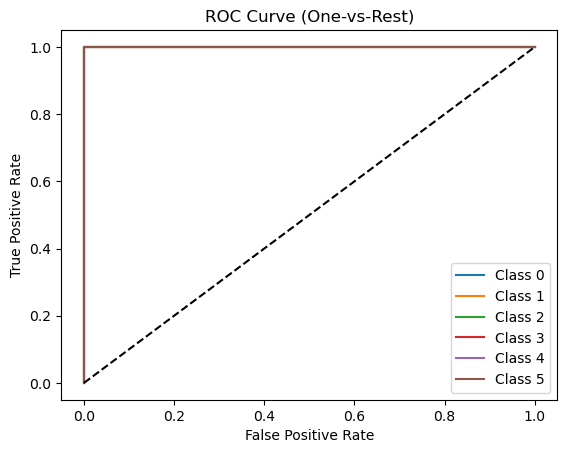

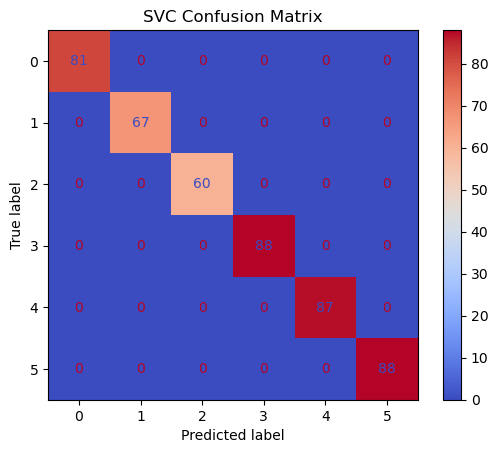

In [41]:
# Predict using the SVC pipeline
svc_pred = svc_pipeline.predict(X_test)

# Calculate metrics for SVC pipeline
svc_acc = accuracy_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred, average='macro')
svc_f1 = f1_score(y_test, svc_pred, average='macro')
svc_f2 = fbeta_score(y_test, svc_pred, beta=2, average='macro')
svc_cm = confusion_matrix(y_test, svc_pred)
# Precision (macro)
precision = precision_score(y_test, svc_pred, average='macro')
print("SVC Pipeline Metrics:")
print("Precision (macro):", precision)
print("Accuracy:", svc_acc)
print("Recall (macro):", svc_recall)
print("F1 Score (macro):", svc_f1)
print("F2 Score (macro):", svc_f2)
print("Confusion Matrix:\n", svc_cm)

# AUC-ROC (One-vs-Rest, macro)
if hasattr(svc_pipeline.named_steps['classifier'], "predict_proba"):
    y_proba = svc_pipeline.predict_proba(X_test)
    auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    print("AUC-ROC (macro, OVR):", auc_roc)
    # Plot ROC curve for each class
    from sklearn.preprocessing import label_binarize
    n_classes = y_proba.shape[1]
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (One-vs-Rest)')
    plt.legend()
    plt.show()
else:
    print("Classifier does not support predict_proba; cannot compute ROC curve.")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm)
disp.plot(cmap='coolwarm')
plt.title("SVC Confusion Matrix")
plt.show()

KNN Pipeline Metrics:
Accuracy: 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
F2 Score (macro): 1.0
Confusion Matrix:
 [[81  0  0  0  0  0]
 [ 0 67  0  0  0  0]
 [ 0  0 60  0  0  0]
 [ 0  0  0 88  0  0]
 [ 0  0  0  0 87  0]
 [ 0  0  0  0  0 88]]


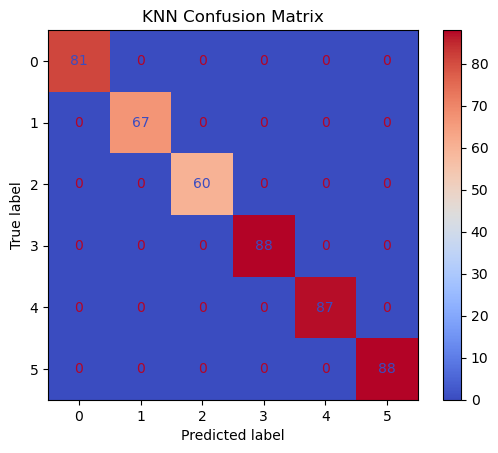

In [42]:
# Predict using the KNN pipeline
knn_pred = knn_pipeline.predict(X_test)

# Calculate metrics for KNN pipeline
knn_acc = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')
knn_f2 = fbeta_score(y_test, knn_pred, beta=2, average='macro')
knn_cm = confusion_matrix(y_test, knn_pred)

print("KNN Pipeline Metrics:")
print("Accuracy:", knn_acc)
print("Recall (macro):", knn_recall)
print("F1 Score (macro):", knn_f1)
print("F2 Score (macro):", knn_f2)
print("Confusion Matrix:\n", knn_cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
disp.plot(cmap='coolwarm')
plt.title("KNN Confusion Matrix")
plt.show()

Using the pipeline to predict for the validate dataset

In [57]:
# Remove 'S.No.' column from validate_df to match training features
validate_features = validate_df.drop(columns=['S.No.'])

# Normalize Star_Color in the same way as training data
validate_features['Star_Color'] = validate_features['Star_Color'].str.lower().str.replace('-', ' ').str.strip()

# Preprocess the validation features using the preprocessing pipeline
validate_processed = preprocessing_pipeline.transform(validate_features)

# Predict Star_Type using the trained Random Forest pipeline
validate_predictions = rf_pipeline.predict(validate_features)

print(validate_predictions)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 2 2 2 2 2 3 2 3 3 2 5 4 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 5 3 3 3 4 4 4 4 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 4 3 3 4 5 5 3 4 3 3 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [58]:
print(validate_df.count(), validate_df.shape, "\n")
validate_predictions.size

S.No.                 240
Temperature_K         240
Luminosity_Lo         240
Radius_Ro             240
Absolute_Magnitude    240
Star_Color            240
Spectral_Class        240
dtype: int64 (240, 7) 



240

In [60]:
# Saving validate_predictions to a CSV file with corresponding S.No. from validate_df
output_df = validate_df[['S.No.']].copy()
output_df['Predicted_Star_Type'] = validate_predictions
output_df.to_csv('prediction__21324004.csv', index=False)

In [173]:
import joblib

# Saving each pipeline as a separate .pkl file
joblib.dump(rf_pipeline, 'rf_pipeline.pkl')
joblib.dump(svc_pipeline, 'svc_pipeline.pkl')
joblib.dump(knn_pipeline, 'knn_pipeline.pkl')

['knn_pipeline.pkl']